## Generating Stochastic Trajectory Realizations from HDPHMM output

In this notebook, we generate stochastic trajectories based on the parameters determined from the HDPHMM algorithm. 

We will start by generating the parameters. I'll skip the trajectory loading and use the center of mass trajectory which I've saved as a pickle file: comr.pl. The center of mass coordinates or in terms of their z and r (w.r.t. pore center) positions.

In [29]:
import hdphmm
import mdtraj as md
import numpy as np

difference = False  # take first order difference of solute trajectories
observation_model='AR'  # assume an autoregressive model
order = 1  # autoregressive order
max_states = 100
traj_no = 2# None # np.arange(24)#2
first_frame = 7000  # frame after which simulation is equilibrated
dim = [0, 1]
prior = 'MNIW-N'  # MNIW-N or MNIW
link = False  # link trajectories and add phantom state
parameterize_each = True

# You can define a dictionary with some spline paramters
spline_params = {'npts_spline': 10, 'save': True, 'savename': 'spline_hdphmm.pl'}

com = 'comr.pl'  # center of mass trajectories. If it exists, we can skip loading the MD trajectory and just load this

ihmm = []

for t in range(24):

    ihmm.append(hdphmm.InfiniteHMM(com, traj_no=t, load_com=True, difference=difference, observation_model=observation_model, order=order, 
                          max_states=max_states, first_frame=first_frame, spline_params=spline_params, dim=dim, 
                          prior=prior, link=link, parameterize_each=parameterize_each))

Loaded center-of-mass coordinates
Fitting 1 2 dimensional trajectories assuming an autoregressive order of 1
(4807, 1, 2)
Loaded center-of-mass coordinates
Fitting 1 2 dimensional trajectories assuming an autoregressive order of 1
(4807, 1, 2)
Loaded center-of-mass coordinates
Fitting 1 2 dimensional trajectories assuming an autoregressive order of 1
(4807, 1, 2)
Loaded center-of-mass coordinates
Fitting 1 2 dimensional trajectories assuming an autoregressive order of 1
(4807, 1, 2)
Loaded center-of-mass coordinates
Fitting 1 2 dimensional trajectories assuming an autoregressive order of 1
(4807, 1, 2)
Loaded center-of-mass coordinates
Fitting 1 2 dimensional trajectories assuming an autoregressive order of 1
(4807, 1, 2)
Loaded center-of-mass coordinates
Fitting 1 2 dimensional trajectories assuming an autoregressive order of 1
(4807, 1, 2)
Loaded center-of-mass coordinates
Fitting 1 2 dimensional trajectories assuming an autoregressive order of 1
(4807, 1, 2)
Loaded center-of-mass co

Now, let's load carry out the inference procedure:

In [31]:
for i in range(24):
    ihmm[i].inference(50)

100%|██████████| 50/50 [01:03<00:00,  1.17s/it]


Now we can visualize the state predictions if we want.

[2, 6, 7, 15, 30, 45, 51, 54, 55, 56, 64, 69, 73, 80, 84, 91, 98]
Found 17 unique states


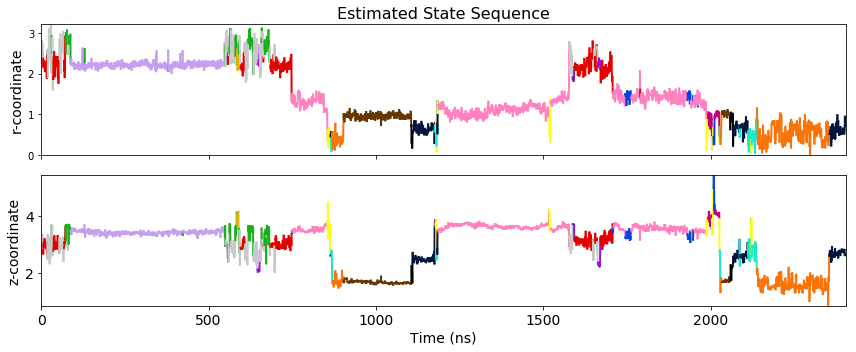

In [32]:
#for i in range(3):
    #ihmm[i].summarize_results(traj_no=0)
ihmm[2].summarize_results(traj_no=0)

In [41]:
params = []

for i in range(24):
    ihmm[i]._get_params()
    params.append(ihmm[i].converged_params)
# print(ihmm.converged_params['mu'].mean(axis=0))
# from LLC_Membranes.llclib import file_rw

# file_rw.save_object(ihmm.converged_params, 'params.pl')

Found 13 unique states

Estimated Transition Matrix:

[[0.9416 0.     0.     0.024  0.     0.     0.0005 0.     0.     0.009
  0.0036 0.0157 0.0055]
 [0.     0.9593 0.     0.0012 0.     0.     0.0022 0.     0.     0.
  0.003  0.0333 0.0011]
 [0.     0.0021 0.9583 0.0088 0.     0.     0.0017 0.0001 0.0121 0.
  0.     0.0133 0.0036]
 [0.     0.     0.     0.9568 0.     0.     0.     0.     0.     0.
  0.     0.0383 0.005 ]
 [0.     0.     0.     0.0004 0.9526 0.     0.     0.     0.002  0.0011
  0.0357 0.0082 0.    ]
 [0.     0.     0.0001 0.0038 0.0001 0.9648 0.     0.     0.007  0.
  0.     0.0241 0.0002]
 [0.     0.0226 0.     0.0012 0.     0.     0.9661 0.     0.0002 0.
  0.001  0.0076 0.0013]
 [0.     0.0011 0.     0.0129 0.0015 0.     0.     0.9429 0.0149 0.0009
  0.     0.0258 0.    ]
 [0.     0.0034 0.     0.0001 0.0008 0.     0.     0.     0.9541 0.
  0.0401 0.0015 0.0001]
 [0.     0.0005 0.0047 0.0019 0.     0.     0.0009 0.     0.     0.988
  0.0003 0.0025 0.0012]
 [0.     0.0


Autoregressive parameters equilibrated after 46 iterations
Found 7 unique states

Estimated Transition Matrix:

[[0.9845 0.     0.0001 0.0102 0.0039 0.0013 0.    ]
 [0.0002 0.9329 0.0026 0.     0.     0.0036 0.0607]
 [0.0004 0.0006 0.9866 0.     0.     0.0002 0.0121]
 [0.0066 0.     0.     0.9932 0.     0.     0.0001]
 [0.0068 0.0001 0.     0.     0.9913 0.0016 0.0002]
 [0.0027 0.     0.0027 0.     0.     0.9736 0.0209]
 [0.     0.003  0.0198 0.     0.     0.0035 0.9737]]

Autoregressive parameters equilibrated after 46 iterations
Found 10 unique states

Estimated Transition Matrix:

[[0.9719 0.     0.     0.     0.     0.     0.     0.     0.0039 0.0242]
 [0.0089 0.9805 0.     0.     0.     0.     0.0001 0.0091 0.     0.0014]
 [0.0002 0.     0.995  0.0011 0.     0.     0.003  0.     0.     0.0006]
 [0.0002 0.     0.     0.9739 0.     0.     0.0259 0.     0.     0.    ]
 [0.0018 0.0001 0.     0.     0.9828 0.0001 0.     0.     0.     0.0152]
 [0.0001 0.0001 0.     0.0067 0.     0.9927


Autoregressive parameters equilibrated after 46 iterations
Found 12 unique states

Estimated Transition Matrix:

[[0.9571 0.0076 0.     0.     0.     0.0044 0.     0.0157 0.0012 0.
  0.0141 0.    ]
 [0.0017 0.9802 0.0001 0.     0.     0.0039 0.0123 0.0003 0.0008 0.
  0.0007 0.    ]
 [0.     0.     0.9798 0.0021 0.     0.0001 0.     0.0139 0.0003 0.0001
  0.0036 0.    ]
 [0.     0.0018 0.     0.9376 0.     0.0061 0.0112 0.     0.0045 0.0238
  0.0145 0.0005]
 [0.     0.     0.     0.0002 0.9774 0.0067 0.     0.0001 0.0035 0.
  0.0121 0.    ]
 [0.     0.029  0.     0.     0.     0.8996 0.0002 0.     0.0712 0.
  0.     0.    ]
 [0.     0.0164 0.     0.     0.     0.0001 0.7321 0.     0.244  0.
  0.0074 0.    ]
 [0.     0.     0.     0.0133 0.0003 0.     0.     0.8855 0.0006 0.0059
  0.001  0.0935]
 [0.     0.0016 0.     0.0003 0.0006 0.0015 0.0544 0.     0.9291 0.
  0.0125 0.    ]
 [0.     0.     0.     0.0005 0.     0.     0.     0.0057 0.0004 0.9933
  0.     0.0001]
 [0.     0.     0.  

Since the mean shifts frequently in these trajectories, and we placed a prior on the mean, the algorithm has discovered many states. We are going to reduce the state space using a clustering algorithm. 

Clustering partitions data by minimizing the distance between sets of parameters and a parameter centroid. See https://scikit-learn.org/stable/modules/clustering.html for a more detailed look at clustering algorithms.

Agglomerative clustering does not require the number of clusters to be defined beforehand. Instead we define a distance threshold. Clusters are formed until the distance between centroids goes under this threshold. Higher distance thresholds lead to less clusters.

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
Initialization converged: True
35


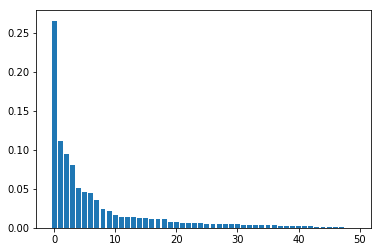

In [94]:
from hdphmm.cluster import Cluster
import matplotlib.pyplot as plt

clusters = Cluster(params, algorithm='bayesian', ncomponents=50, max_iter=2000, \
                   weight_concentration_prior_type='dirichlet_process', weight_concentration_prior=1, \
                   mean_precision_prior=1, init_params='kmeans', means=True)

clusters.fit()

weights = clusters.clusters.weights_

#print(np.argmax(weights))
#print(clusters.clusters.means_[np.argmax(weights)])
print(np.unique(clusters.labels).size)
plt.bar(np.arange(weights.size), np.sort(weights)[::-1])
plt.show()

# print((clusters.clusters.weights_ > 0.03).sum())
#print(clusters.labels.size)
#print(len(np.unique(clusters.labels)))
#print(dir(clusters.clusters))

In [23]:
from sklearn.cluster import AgglomerativeClustering

A = ihmm.converged_params['A']
sigma = ihmm.converged_params['sigma']

X = np.zeros([sigma.shape[0] * sigma.shape[-1], 8])

for i in range(sigma.shape[-1]):
     for j in range(sigma.shape[0]):
         w, v = np.linalg.eig(sigma[j, ..., i])
         X[i*sigma.shape[0] + j, :] = np.concatenate((A[j, 0, ..., i].flatten(), v.flatten()))

X -= X.min(axis=0)
X /= X.max(axis=0)

clusters = AgglomerativeClustering(n_clusters=None, distance_threshold=2)
labels = clusters.fit_predict(X)

X[np.where(labels == 2)[0]]

array([[0.3186, 0.5861, 0.5218, 0.1756, 0.9542, 0.8253, 0.1747, 0.9542],
       [0.3892, 0.6232, 0.5465, 0.1853, 0.9835, 0.7056, 0.2944, 0.9835],
       [0.3623, 0.671 , 0.5745, 0.1901, 0.9758, 0.7438, 0.2562, 0.9758],
       [0.2971, 0.6049, 0.5756, 0.1675, 0.9747, 0.7489, 0.2511, 0.9747],
       [0.3685, 0.585 , 0.6243, 0.1328, 0.9341, 0.8826, 0.1174, 0.9341],
       [0.3246, 0.6132, 0.5454, 0.1715, 0.9708, 0.7654, 0.2346, 0.9708],
       [0.2996, 0.6022, 0.5385, 0.227 , 0.9342, 0.8823, 0.1177, 0.9342],
       [0.3396, 0.6248, 0.6173, 0.1803, 0.9787, 0.7304, 0.2696, 0.9787],
       [0.3434, 0.6418, 0.5876, 0.1879, 0.9505, 0.8369, 0.1631, 0.9505],
       [0.3322, 0.6127, 0.5578, 0.192 , 0.9645, 0.7899, 0.2101, 0.9645],
       [0.4143, 0.6396, 0.5953, 0.1562, 0.925 , 0.9051, 0.0949, 0.925 ],
       [0.3356, 0.6205, 0.5689, 0.1499, 0.8828, 0.9905, 0.0095, 0.8828],
       [0.2883, 0.5832, 0.5635, 0.191 , 0.9663, 0.7834, 0.2166, 0.9663],
       [0.3251, 0.4913, 0.5808, 0.1587, 0.9817, 0.7

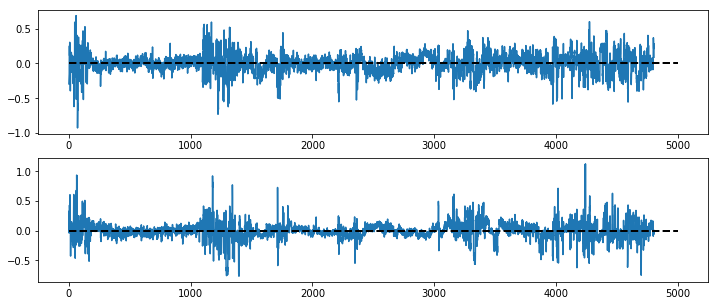

In [24]:
import matplotlib.pyplot as plt

found_states = np.unique(ihmm.z[0, :])
map_state_to_ndx = {x:i for i, x in enumerate(found_states)}
state_sequence = np.array([map_state_to_ndx[i] for i in ihmm.z[0, :]])
traj = ihmm.trajectories[:, 0, :]

mu = ihmm.converged_params['mu'].mean(axis=0)
A = ihmm.converged_params['A'][:, 0, ...].mean(axis=0)

# important!
unconditional_mean = np.zeros_like(mu)
for i in range(len(found_states)):
    unconditional_mean[:, i] = np.linalg.inv(np.eye(2) - A[..., i]) @ mu[:, i]

diff = unconditional_mean[:, state_sequence].T
zeroed = traj - diff

fig, ax = plt.subplots(2, 1, figsize=(12, 5))
ax[0].plot(zeroed[:, 0])
ax[1].plot(zeroed[:, 1])
ax[0].plot([0, 5000], [0, 0], '--', color='black', lw=2)
ax[1].plot([0, 5000], [0, 0], '--', color='black', lw=2)
plt.show()

In [25]:
from LLC_Membranes.llclib import file_rw

data = (zeroed[:, np.newaxis, :], 500)
file_rw.save_object(data, 'data.pl')

In [26]:
import hdphmm
import mdtraj as md
import numpy as np

difference = False  # take first order difference of solute trajectories
observation_model='AR'  # assume an autoregressive model
order = 1  # autoregressive order
max_states = 100
traj_no = 0
first_frame = 7000  # frame after which simulation is equilibrated
dim = [0, 1]
difference = False
prior = 'MNIW'  # MNIW-N or MNIW
link = False  # link trajectories and add phantom state

# You can define a dictionary with some spline paramters
spline_params = {'npts_spline': 10, 'save': True, 'savename': 'spline_hdphmm.pl'}

com = 'data.pl'  # center of mass trajectories. If it exists, we can skip loading the MD trajectory and just load this

ihmm = hdphmm.InfiniteHMM(com, traj_no=traj_no, load_com=True, difference=difference, observation_model=observation_model, order=order, 
                          max_states=max_states, first_frame=first_frame, spline_params=spline_params, dim=dim, 
                          prior=prior, link=link)

Loaded center-of-mass coordinates
Fitting 1 2 dimensional trajectories assuming an autoregressive order of 1


In [34]:
ihmm.d = 0.1
ihmm.inference(50)

100%|██████████| 50/50 [00:31<00:00,  1.62it/s]


[16, 47, 89]
Found 3 unique states

Estimated Transition Matrix:

[[0.9559 0.0201 0.0241]
 [0.0102 0.9877 0.0022]
 [0.0919 0.012  0.8961]]


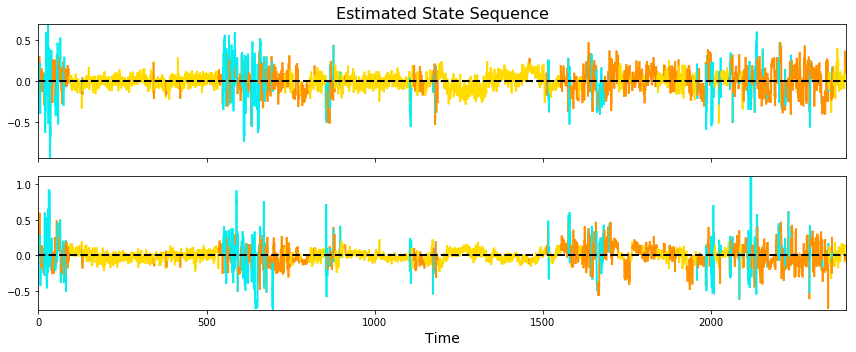

In [38]:
ihmm.summarize_results()

In [ ]:
from hdphmm.generate_timeseries import GenARData

In [ ]:
print(ihmm.converged_params['mu'].mean(axis=0))

In [ ]:
trajectory_generator = GenARData(params=ihmm.converged_params)
trajectory_generator.gen_trajectory(2000, 1, unbound_dimensions=[1])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 1, figsize=(12, 5))

for i in range(1):
    ax[0].plot(i*5 + trajectory_generator.traj[:, i, 1], lw=2)
    ax[1].plot(i*5 + trajectory_generator.traj[:, i, 0], lw=2)
    print(trajectory_generator
          .traj[:, i, 0].min())
    
ax[0].set_title('AR(%d)' %ihmm.order, fontsize=14)
ax[0].set_xlabel('Step number', fontsize=14)
ax[0].set_ylabel('z coordinate', fontsize=14)
ax[0].tick_params(labelsize=14)

#ax[1].set_title('AR(%d)' %ihmm.order, fontsize=14)
ax[1].set_xlabel('Step number', fontsize=14)
ax[1].set_ylabel('r coordinate', fontsize=14)
ax[1].tick_params(labelsize=14)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 1, figsize=(12, 5))

ax[0].plot(np.cumsum(trajectory_generator.traj[:, 0, 0]), lw=2)
ax[1].plot(np.cumsum(trajectory_generator.traj[:, 0, 1]), lw=2)

plt.show()